## Setup and read data

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
import pandas
import sklearn.linear_model
import sklearn.model_selection
import sklearn.metrics

In [2]:
df = pandas.read_excel('data.xlsx')

In [3]:
df

,Group nmae,Group category,Group size,Message number,density,Sex ratio,Average year,Age gap,Regional concentration,Mobile ratio,Session number,No-response ratio,Night-chat ratio,Picture ratio
0,**手酒吧,1,63,315,0.051715,0.882353,26.681818,6.409413,0.222222,0.088889,23,0.434783,0.085714,0.069841
1,**秀嘉园,1,73,2,0.010274,0.579710,27.500000,9.042524,0.406780,0.000000,2,1.000000,1.000000,0.000000
2,**ˇ⒊無黒\噵丶⒈群,1,73,4,0.024163,0.750000,23.415385,4.699893,0.287879,0.500000,4,1.000000,0.000000,0.250000
3,**海网管工作联系基地,1,91,14,0.006105,0.901639,29.409091,2.854965,0.340426,0.142857,7,1.000000,0.250000,0.000000
4,tbsgame.net/bbs,1,133,2112,0.011107,0.961832,30.319672,4.669866,0.110236,0.167140,327,0.532110,0.104640,0.037879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,**装营销与交流,5,211,181,0.012255,0.584541,28.330000,6.844056,0.345972,0.044199,127,0.881890,0.165746,0.000000
2036,**州马自达汽车配件,5,154,72,0.024191,0.888889,27.928571,6.306055,0.572368,0.305556,46,0.826087,0.138889,0.083333
2037,**售交流心得,5,120,445,0.002171,0.562500,25.723810,7.243382,0.264957,0.042697,71,0.774648,0.016949,0.004494
2038,PCB行业交流群,5,72,55,0.066315,0.549296,27.085714,4.142956,0.704225,0.272727,21,0.619048,0.000000,0.000000


## 1. Anova

In [4]:
max(df['Average year'])

44.243902439

In [5]:
average_years_by_category = []
for category in set(df['Group category']):
    average_years_by_category.append(list(df[df['Group category'] == category]['Average year']))
len(average_years_by_category)

5

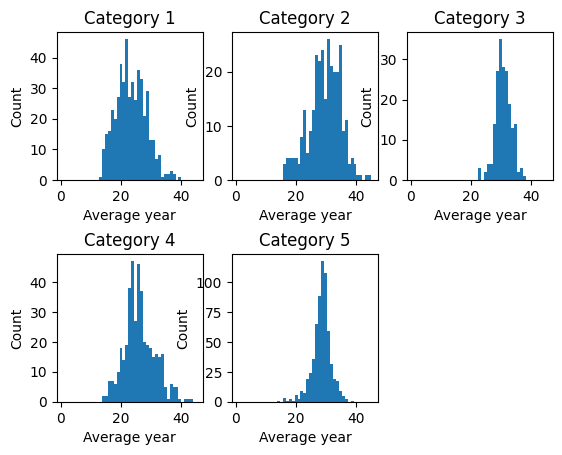

In [6]:
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.hist(average_years_by_category[i],bins=45,range=(1,45))
    plt.title(f'Category {i+1}')
    plt.xlabel('Average year')
    plt.ylabel('Count')
plt.subplots_adjust(hspace=0.5)

In [7]:
for i in range(5):
    print(f'Category {i+1} mean={np.mean(average_years_by_category[i])} variance={np.var(average_years_by_category[i])}')

Category 1 mean=23.404277959311987 variance=24.1932947105518
Category 2 mean=29.618193496517332 variance=27.13022236262036
Category 3 mean=30.79153401603112 variance=6.484053424060877
Category 4 mean=26.255317864947997 variance=25.931054766734427
Category 5 mean=28.545080703967084 variance=9.099879902623535


In [8]:
scipy.stats.f_oneway(*average_years_by_category)

F_onewayResult(statistic=171.50703270711966, pvalue=1.0820916064752822e-126)

P-Value is very small. So we reject the null hypothesis that the distributions are the same. So we conclude the distributions are not the same.

## 2. Regression Problems
### 2a

In [9]:
data = df[df['Session number'] >= 20][['Average year', 'No-response ratio', 'Night-chat ratio', 'Picture ratio']]
data

,Average year,No-response ratio,Night-chat ratio,Picture ratio
0,26.681818,0.434783,0.085714,0.069841
4,30.319672,0.532110,0.104640,0.037879
5,26.112500,0.700000,0.142857,0.065934
7,26.313433,0.550000,0.034783,0.026087
8,24.415094,0.414508,0.238783,0.017526
...,...,...,...,...
2035,28.330000,0.881890,0.165746,0.000000
2036,27.928571,0.826087,0.138889,0.083333
2037,25.723810,0.774648,0.016949,0.004494
2038,27.085714,0.619048,0.000000,0.000000


No-response ratio
y=0.012874966195763943x+0.28629323418847064
rmse=0.1996806059731858

Night-chat ratio
y=-0.00907208149528136x+0.3899288621426378
rmse=0.11806135693554401

Picture ratio
y=-0.0006500642284511982x+0.04738408786102774
rmse=0.04604459761098701



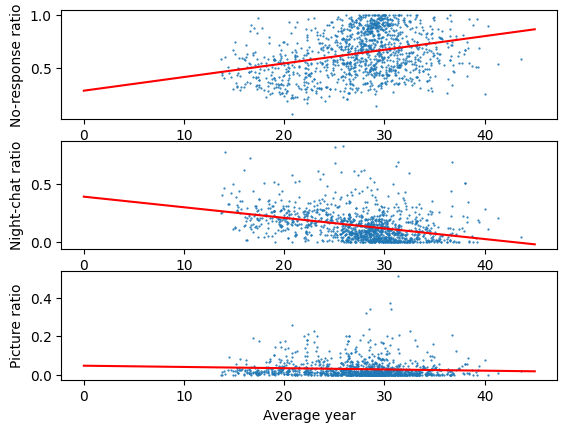

In [10]:
rmse_values = []

for i in range(len(data.columns)-1):
    x = data['Average year']
    y = data[data.columns[i+1]]
    result = scipy.stats.linregress(x,y)
    predicted = result.slope*x+result.intercept
    rmse = np.sqrt(np.square(predicted - y).mean())
    rmse_values.append(rmse)

    print(f'{data.columns[i+1]}\ny={result.slope}x+{result.intercept}\nrmse={rmse}\n')
    
    plt.subplot(3,1,i+1)
    plt.scatter(x,y,s=0.3)
    plt.plot(range(0,46),result.slope*range(0,46)+result.intercept,color='red')
    plt.xlabel('Average year')
    plt.ylabel(data.columns[i+1])

In [11]:
np.var(rmse_values)

0.003939126500283263

### 2b

In [12]:
rmse_values = []
x = df[df.columns[2:10]]
for col_name in df.columns[11:14]:
    print(col_name)
    y = df[col_name]
    reg = sklearn.linear_model.LinearRegression().fit(
        x, y, sample_weight=df['Session number']
    )
    slope = reg.coef_
    intercept = reg.intercept_
    
    predicted = reg.predict(x)
    rmse = np.sqrt(np.square(predicted - y).mean())
    rmse_values.append(rmse)
    
    print(f'slopes: {slope}\nintercept: {intercept}\nrmse: {rmse}\nformula:')
    formula_string = 'y='
    for s, c in zip(slope, df.columns[2:10]):
        formula_string += f'({s:.2f}*{c.lower().replace(" ", "_")}) +\n'
    formula_string = formula_string[:-3]
    print(formula_string)
    print()

No-response ratio
slopes: [-5.38390841e-05 -4.68122627e-06 -4.12202947e-02 -2.13593440e-02
  7.94852627e-03 -2.49244576e-03 -4.24498335e-02 -1.85867365e-01]
intercept: 0.4799790129342703
rmse: 0.25580269286283785
formula:
y=(-0.00*group_size) +
(-0.00*message_number) +
(-0.04*density) +
(-0.02*sex_ratio) +
(0.01*average_year) +
(-0.00*age_gap) +
(-0.04*regional_concentration) +
(-0.19*mobile_ratio)

Night-chat ratio
slopes: [-4.68507762e-05  3.54148670e-07  4.53317569e-02  3.92147641e-02
 -8.38068734e-03  1.05094105e-02 -4.25586808e-02  1.30062681e-01]
intercept: 0.28046309561669946
rmse: 0.18119218694541428
formula:
y=(-0.00*group_size) +
(0.00*message_number) +
(0.05*density) +
(0.04*sex_ratio) +
(-0.01*average_year) +
(0.01*age_gap) +
(-0.04*regional_concentration) +
(0.13*mobile_ratio)

Picture ratio
slopes: [-2.70603813e-05  6.03498547e-07  2.52727446e-04  2.36349628e-02
 -7.81753362e-04  4.88163181e-04 -1.17837768e-02 -8.52112529e-03]
intercept: 0.043845483651511724
rmse: 0.08109

In [13]:
np.var(rmse_values)

0.0051233336559324575

### 2c

In [14]:
data = pandas.concat([df[df['Group category'] == 1], df[df['Group category'] == 4]])
data

,Group nmae,Group category,Group size,Message number,density,Sex ratio,Average year,Age gap,Regional concentration,Mobile ratio,Session number,No-response ratio,Night-chat ratio,Picture ratio
0,**手酒吧,1,63,315,0.051715,0.882353,26.681818,6.409413,0.222222,0.088889,23,0.434783,0.085714,0.069841
1,**秀嘉园,1,73,2,0.010274,0.579710,27.500000,9.042524,0.406780,0.000000,2,1.000000,1.000000,0.000000
2,**ˇ⒊無黒\噵丶⒈群,1,73,4,0.024163,0.750000,23.415385,4.699893,0.287879,0.500000,4,1.000000,0.000000,0.250000
3,**海网管工作联系基地,1,91,14,0.006105,0.901639,29.409091,2.854965,0.340426,0.142857,7,1.000000,0.250000,0.000000
4,tbsgame.net/bbs,1,133,2112,0.011107,0.961832,30.319672,4.669866,0.110236,0.167140,327,0.532110,0.104640,0.037879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,**验中学首届高中班,4,52,7,0.053922,0.634615,36.568182,8.296762,0.893617,0.571429,7,1.000000,0.285714,0.285714
1401,**龙中学01届初三四班,4,68,95,0.285119,0.597015,27.180328,2.243447,0.639344,0.621053,13,0.384615,0.021053,0.021053
1402,**年级师生群,4,64,46,0.262153,0.562500,16.101695,6.374459,0.868852,0.565217,11,0.454545,0.304348,0.021739
1403,**坪中学2010届,4,59,145,0.298364,0.576271,21.915254,1.720151,0.542373,0.613793,32,0.593750,0.262069,0.055172


In [15]:
np.random.seed(1)
train, test = sklearn.model_selection.train_test_split(data, test_size=0.1)

In [16]:
y_train = train['Group category']
x_train = train.drop(['Group category', 'Group nmae'], axis=1)
y_test = test['Group category']
x_test = test.drop(['Group category', 'Group nmae'], axis=1)

In [17]:
reg = sklearn.linear_model.LogisticRegression(max_iter=500).fit(x_train, y_train)
y_pred = reg.predict(x_test)
sklearn.metrics.accuracy_score(y_test, y_pred)

0.8571428571428571

In [18]:
sklearn.metrics.confusion_matrix(y_test, y_pred, labels=[1,4])

array([[45,  5],
       [ 8, 33]], dtype=int64)

**Try dropping some features which seem unhelpful.**

In [19]:
for i, col in enumerate(x_train.columns):
    print(x_train[col].std() * reg.coef_[0][i])

0.04429548419438655
-0.07564035012168875
0.5401223924917716
-0.46030234502539036
1.2077852853225182
-0.948346795893883
0.4079953300888948
0.2764683010414769
-0.5174535139094842
-0.2709736638340823
0.11223884376455331
-0.0006397267361136518


In [20]:
to_drop = ['Group size', 'Message number']
x_train2 = x_train.drop(to_drop, axis=1)
x_test2 = x_test.drop(to_drop, axis=1)

In [21]:
reg2 = sklearn.linear_model.LogisticRegression(max_iter=500).fit(x_train2, y_train)
y_pred2 = reg2.predict(x_test2)
sklearn.metrics.accuracy_score(y_test, y_pred2)

0.8681318681318682

In [22]:
sklearn.metrics.confusion_matrix(y_test, y_pred2, labels=[1,4])

array([[45,  5],
       [ 7, 34]], dtype=int64)

**Try multi-class classification with all categories**

In [23]:
np.random.seed(1)
train, test = sklearn.model_selection.train_test_split(df, test_size=0.1)

y_train = train['Group category']
x_train = train.drop(['Group category', 'Group nmae'], axis=1)
y_test = test['Group category']
x_test = test.drop(['Group category', 'Group nmae'], axis=1)

reg = sklearn.linear_model.LogisticRegression(max_iter=15000).fit(x_train, y_train)
y_pred = reg.predict(x_test)
sklearn.metrics.accuracy_score(y_test, y_pred)

0.5490196078431373

In [24]:
sklearn.metrics.confusion_matrix(y_test, y_pred, labels=range(1,6))

array([[24,  1,  1,  4, 15],
       [ 4,  5,  1,  0, 15],
       [ 2,  0,  3,  5, 14],
       [ 3,  0,  1, 35,  8],
       [11,  3,  2,  2, 45]], dtype=int64)

In [25]:
# quite bad accuracy, try to normalize the data

for col_name in x_train.columns:
    current_col = x_train[col_name]
    x_train[col_name] = (current_col - np.mean(current_col)) / current_col.std()
    current_col = x_test[col_name]
    x_test[col_name] = (current_col - np.mean(current_col)) / current_col.std()
x_train

,Group size,Message number,density,Sex ratio,Average year,Age gap,Regional concentration,Mobile ratio,Session number,No-response ratio,Night-chat ratio,Picture ratio
2010,-0.504364,-0.208409,-0.103966,-0.808241,-0.351862,0.288638,1.025185,0.091277,-0.577189,-1.405626,2.263808,0.750450
1860,10.371294,0.663256,-0.654123,1.160129,-0.499181,0.084546,-1.112620,-0.206657,3.034273,-1.147137,0.421963,-0.110255
898,-0.556118,-0.188296,-0.487044,0.126746,0.151507,0.106613,1.132480,0.474360,-0.450249,0.068213,2.484948,-0.184288
1967,-0.341710,-0.214848,-0.454154,0.258924,-0.964770,0.081078,-0.236265,0.848429,-0.501025,1.095689,0.210894,-0.396845
660,-0.267776,-0.198472,-0.545690,1.447149,-1.649517,-0.292428,-1.252126,-0.463690,-0.310614,-0.509125,0.613695,0.804919
...,...,...,...,...,...,...,...,...,...,...,...,...
1791,-0.149482,-0.104429,-0.053687,-0.494945,0.668932,1.251161,1.407456,-0.939358,2.069524,-0.556449,-0.695644,-0.311272
1096,-0.519151,-0.201016,3.543034,-2.061054,-0.369244,-1.672195,1.193262,-0.641046,-0.488331,-0.733555,-0.681677,-0.193949
1932,-0.400857,-0.209760,0.019827,-0.479882,0.516308,-0.906728,0.958788,-0.729463,-0.532760,-0.044568,-0.136217,0.144209
235,-0.097729,0.272537,-0.619957,1.690486,-1.258621,-0.729883,0.275143,-0.618620,1.726784,-0.824645,0.825431,-0.323093


In [26]:
reg = sklearn.linear_model.LogisticRegression(max_iter=15000).fit(x_train, y_train)
y_pred = reg.predict(x_test)
sklearn.metrics.accuracy_score(y_test, y_pred)

0.6225490196078431

In [27]:
sklearn.metrics.confusion_matrix(y_test, y_pred, labels=range(1,6))

array([[30,  1,  2,  4,  8],
       [ 7,  7,  1,  0, 10],
       [ 0,  0, 12,  0, 12],
       [ 3,  0,  2, 33,  9],
       [ 9,  5,  1,  3, 45]], dtype=int64)

In [28]:
coefs = []
for i, col in enumerate(x_train.columns):
    coef = np.abs(reg.coef_[0][i]) 
    print(coef)
    coefs.append((coef, i))
    
print(sorted(coefs))

0.30983744242084826
0.3318547237669683
0.36428616148466464
0.20840060561762952
1.1744940221714135
0.17206700680095344
0.609032472538045
0.11180958366269053
0.03609572302567446
0.07733618848862159
0.09447310168216164
0.12948853084227568
[(0.03609572302567446, 8), (0.07733618848862159, 9), (0.09447310168216164, 10), (0.11180958366269053, 7), (0.12948853084227568, 11), (0.17206700680095344, 5), (0.20840060561762952, 3), (0.30983744242084826, 0), (0.3318547237669683, 1), (0.36428616148466464, 2), (0.609032472538045, 6), (1.1744940221714135, 4)]


In [29]:
cols_to_drop = [8, 9, 10]
to_drop = list(map(lambda x: x_train.columns[x], cols_to_drop))
x_train2 = x_train.drop(to_drop, axis=1)
x_test2 = x_test.drop(to_drop, axis=1)

In [44]:
to_drop

['Session number', 'No-response ratio', 'Night-chat ratio']

In [30]:
reg2 = sklearn.linear_model.LogisticRegression(max_iter=500).fit(x_train2, y_train)
y_pred2 = reg2.predict(x_test2)
sklearn.metrics.accuracy_score(y_test, y_pred2)

0.6274509803921569

In [31]:
sklearn.metrics.confusion_matrix(y_test, y_pred2, labels=range(1,6))

array([[29,  2,  1,  3, 10],
       [ 6,  7,  1,  0, 11],
       [ 1,  0, 15,  1,  7],
       [ 3,  0,  2, 33,  9],
       [ 9,  5,  2,  3, 44]], dtype=int64)

In [32]:
reg3 = sklearn.linear_model.LogisticRegression(max_iter=500, class_weight='balanced').fit(x_train2, y_train)
y_pred3 = reg3.predict(x_test2)
sklearn.metrics.accuracy_score(y_test, y_pred3)

0.6372549019607843

In [33]:
sklearn.metrics.confusion_matrix(y_test, y_pred3, labels=range(1,6))

array([[29,  6,  4,  3,  3],
       [ 5, 15,  4,  0,  1],
       [ 0,  3, 20,  1,  0],
       [ 3,  2,  2, 33,  7],
       [ 9, 12,  6,  3, 33]], dtype=int64)

## 3. Redoing 2a with Sampling
Numbers for 10 iterations are all very close. So do 100 iterations instead.

In [34]:
data = df[df['Session number'] >= 20][['Average year', 'No-response ratio', 'Night-chat ratio', 'Picture ratio']]

In [35]:
def do_2a(data):
    slopes = []
    intercepts = []
    rmses = []
    
    for i in range(len(data.columns)-1):
        x = data['Average year']
        y = data[data.columns[i+1]]
        result = scipy.stats.linregress(x,y)
        slopes.append(result.slope)
        intercepts.append(result.intercept)
        
        predicted = result.slope*x+result.intercept
        rmses.append(np.sqrt(np.square(predicted - y).mean()))
        
    return np.mean([slopes, intercepts, rmses], axis=1)

**Without sampling**

In [36]:
results = []
for i in range(100):
    results.append(do_2a(data))

In [37]:
np.mean(results, axis=0), np.var(results, axis=0)

(array([0.00105094, 0.24120206, 0.12126219]),
 array([4.23177966e-37, 9.32150093e-32, 4.81482486e-33]))

**SRS**

In [38]:
results = []
for i in range(100):
    np.random.seed(i)
    sample, _ = sklearn.model_selection.train_test_split(data, test_size=0.9)
    results.append(do_2a(sample))

np.mean(results, axis=0), np.var(results, axis=0)

(array([0.00106405, 0.2402546 , 0.11952583]),
 array([1.46958135e-06, 1.19446520e-03, 3.34454919e-05]))

**Convenience Sampling**

In [39]:
results = []
for i in range(100):
    sample = data[:int(len(data)/10)]
    results.append(do_2a(sample))

np.mean(results, axis=0), np.var(results, axis=0)

(array([0.00267778, 0.19767937, 0.12510733]),
 array([9.21587571e-36, 2.77333912e-32, 3.77482269e-32]))

**Stratified Random Sampling**

In [40]:
quantile_splits = np.linspace(0.0, 1.0, 11)
quantile_values = list(map(lambda q: data['Average year'].quantile(q), quantile_splits))
quantile_values[-1] += 1 # to make sure we also sample the last example
strata = []

# rename for query later
data = data.rename(columns={'Average year': 'Average_year'})

for i in range(len(quantile_values) - 1):
    lower_end = quantile_values[i]
    higher_end = quantile_values[i+1]
    stratum = data.query(f'{lower_end} <= Average_year < {higher_end}')
    strata.append(stratum)

In [41]:
results = []
for i in range(100):
    np.random.seed(i)
    stratum_samples = []
    for stratum in strata:
        stratum_sample, _ = sklearn.model_selection.train_test_split(stratum, test_size=0.9)
        stratum_samples.append(stratum_sample)
    sample = pandas.concat(stratum_samples)
    sample = sample.rename(columns={'Average_year': 'Average year'})
    results.append(do_2a(sample))

np.mean(results, axis=0), np.var(results, axis=0)

(array([0.00102266, 0.24085804, 0.11945814]),
 array([1.55760127e-06, 1.18699250e-03, 3.51990586e-05]))